2024-02-29 15:10:16.923 WARNING legend - _parse_legend_args: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


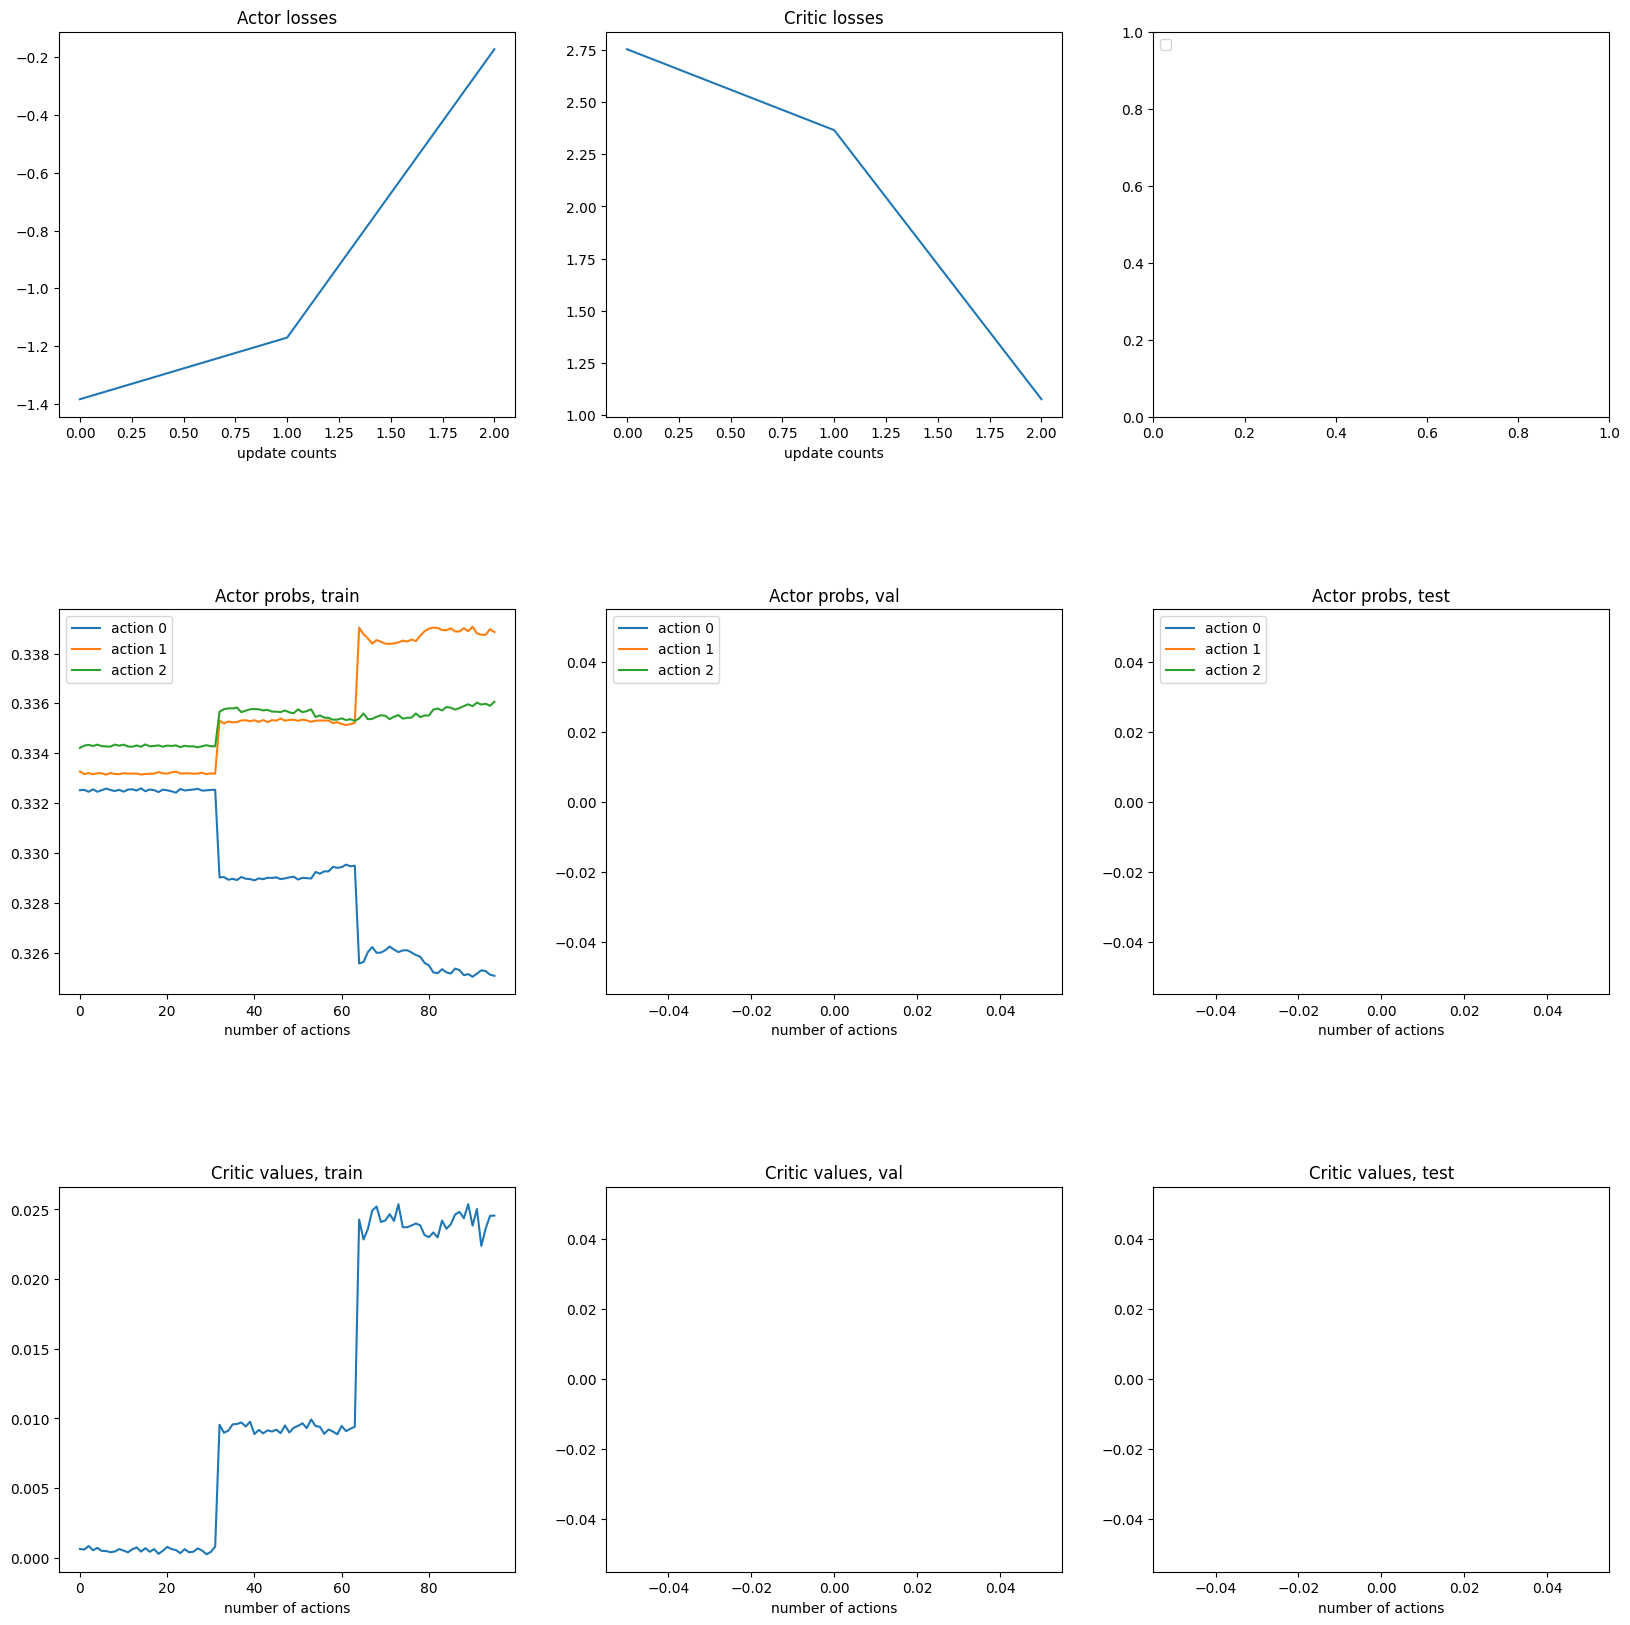

In [1]:
from agent import PPOAgent
from tqdm.auto import tqdm
import random
from copy import deepcopy
import logging
import random

logger = logging.getLogger()
logger.disabled = True


params_all = []
for test_seed in range(1):
    params = {
        "env_str": "room_env:RoomEnv-v1",
        "env_config": {
            "des_size": "l",
            "question_prob": 1.0,
            "allow_random_human": False,
            "allow_random_question": False,
            "check_resources": True,
        },
        "num_episodes": 10,
        "num_rollouts": 40,
        "epoch_per_rollout": 2,
        "batch_size": 32,
        "gamma": 0.7,
        "tau": 0.93,
        "epsilon": 0.2,
        "entropy_weight": 0.05,
        "capacity": {
            "episodic": 16,
            "semantic": 16,
            "short": 1,
        },
        "pretrain_semantic": False,
        "nn_params": {
            "hidden_size": 64,
            "num_layers": 2,
            "embedding_dim": 64,
            "v1_params": {
                "include_human": "sum",
                "human_embedding_on_object_location": False,
            },
            "v2_params": None,
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 128,
            "max_strength": 128,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "plotting_interval": 128,
        "train_seed": test_seed + 5,
        "test_seed": test_seed,
        "device": "cuda",
        "default_root_dir": "./training_results/PPO/TRASH/",
    }
    params_all.append(params)

for params in tqdm(params_all):
    agent = PPOAgent(**params)
    agent.train()

In [12]:
len(agent.critic_values_all["test"])

128

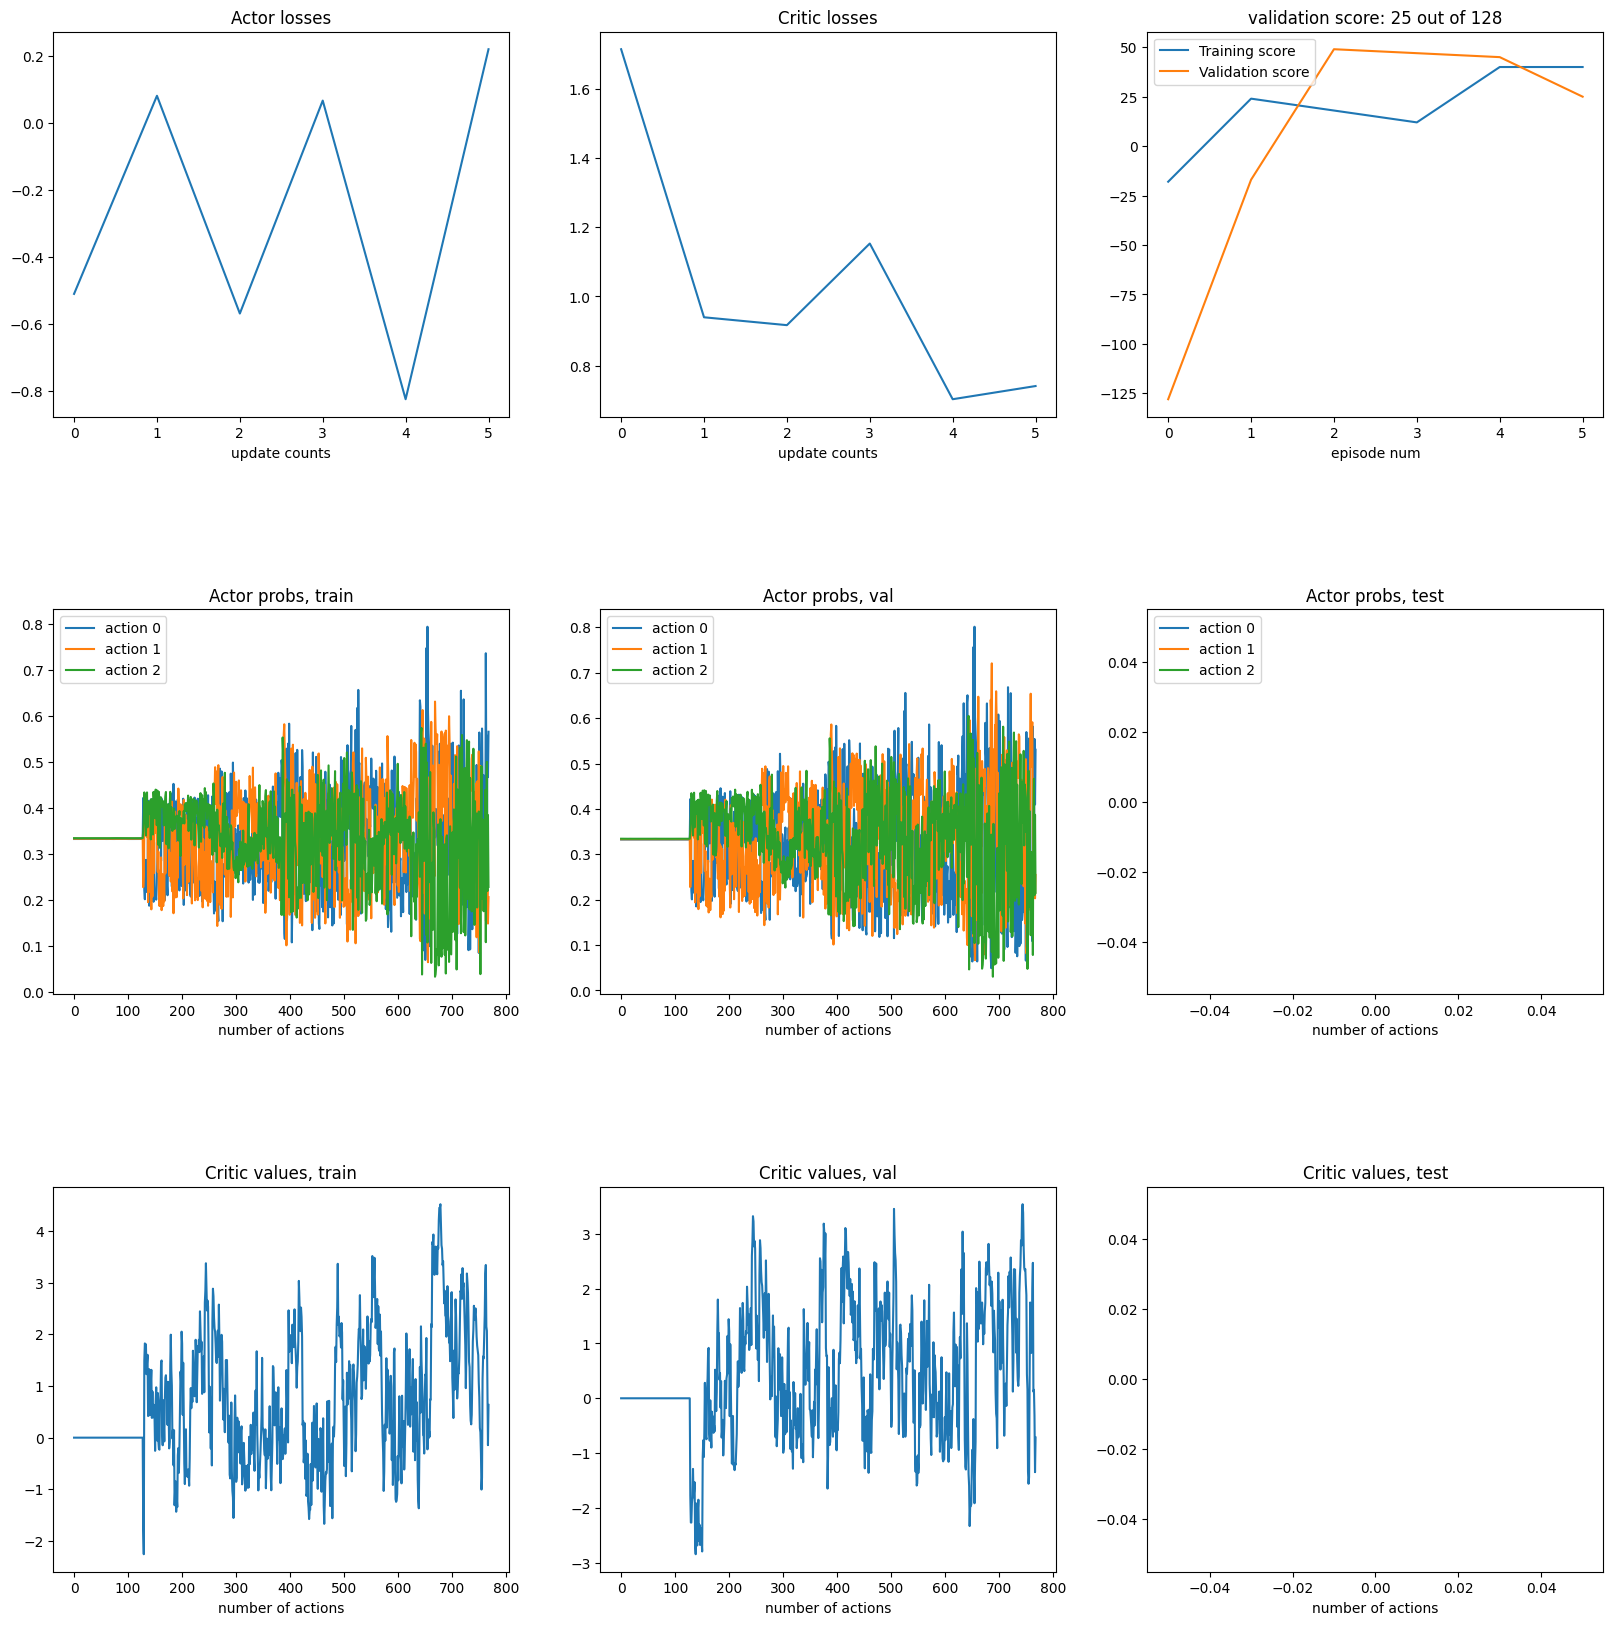

In [1]:
from agent import PPOAgent
from tqdm.auto import tqdm
import random
from copy import deepcopy
import logging
import random

logger = logging.getLogger()
logger.disabled = True


params_all = []
for _ in range(1000):
    hidden_size = random.choice([16, 32, 64, 128, 256])
    num_layers = random.choice([1, 2, 3, 4])
    params = {
        "env_str": "room_env:RoomEnv-v1",
        "env_config": {
            "des_size": "l",
            "question_prob": 1.0,
            "allow_random_human": False,
            "allow_random_question": False,
            "check_resources": True,
        },
        "num_episodes": 20,
        "rollout_multiples": random.choice([1, 2, 4, 8, 16, 32]),
        "epoch": random.choice([4, 8, 16, 32, 64]),
        "batch_size": random.choice([16, 32, 64, 128, 256]),
        "gamma": random.uniform(0.5, 0.99),
        "tau": random.uniform(0.8, 0.99),
        "epsilon": random.uniform(0.1, 0.8),
        "entropy_weight": random.uniform(0.001, 0.5),
        "capacity": {
            "episodic": 16,
            "semantic": 16,
            "short": 1,
        },
        "pretrain_semantic": False,
        "nn_params": {
            "hidden_size": hidden_size,
            "num_layers": num_layers,
            "embedding_dim": hidden_size,
            "v1_params": {
                "include_human": "sum",
                "human_embedding_on_object_location": False,
            },
            "v2_params": None,
            "fuse_information": "sum",
            "include_positional_encoding": True,
            "max_timesteps": 128,
            "max_strength": 128,
        },
        "run_test": True,
        "num_samples_for_results": 10,
        "plotting_interval": 128,
        "train_seed": 5,
        "test_seed": 0,
        "device": "cpu",
        "default_root_dir": "./training_results/PPO/",
    }
    params_all.append(params)

for params in tqdm(params_all):
    agent = PPOAgent(**params)
    try:
        agent.train()
    except:
        continue